<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ana Sofia Dürrmüller Acosta y Cristina Lobera De la Mora

**Fecha:** 23 de noviembre de 2021.

**Expediente** : Ana Sofia: if723489 y Cristina: if714997.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/anadurrmuller/Tarea8_ASDurrmuller_CLobera.git



# Tarea 8

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de
compararlo con los resultados teóricos del método de valuación de Black-Scholes (ecuación del principio)

In [42]:
conda install pandas-datareader

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Procedimiento de Ana Sofia

In [43]:
#importar las paqueterias
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline

#opciones para pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

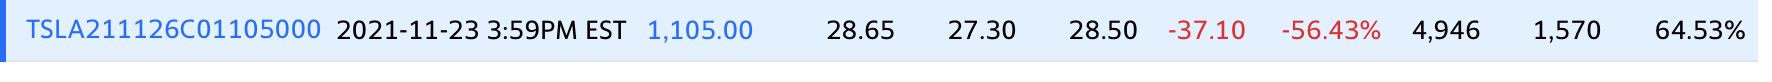

In [4]:
# función para descargar los precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    #  necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

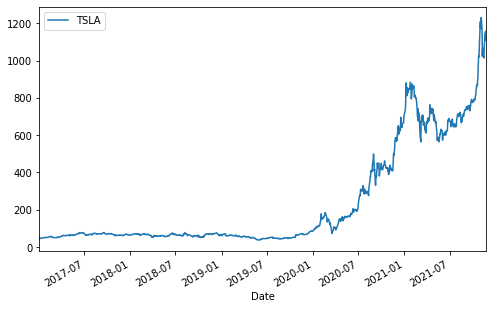

In [5]:
ticker = ['TSLA']
start_date = '2017-01-01'

closes_tsla = get_adj_closes(ticker, start_date)
closes_tsla.plot(figsize=(8,5));
plt.legend(ticker);

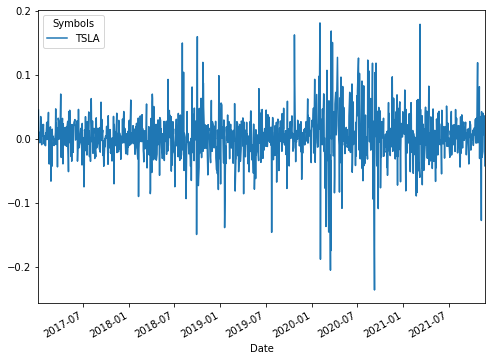

In [6]:
ret_tsla = calc_daily_ret(closes_tsla)
ret_tsla.plot(figsize =(8,6));

In [7]:
# obtenemos el rendimiento simple
Ri = closes_tsla.pct_change(1).iloc[1:]

# obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,TSLA
Date,
2017-01-04,0.046
2017-01-05,-0.001
2017-01-06,0.010
2017-01-09,0.010
2017-01-10,-0.006
...,...
2021-11-17,0.033
2021-11-18,0.007
2021-11-19,0.037


In [8]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-05-20'

nscen = 10000
dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06',
                ...
                '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
                '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
                '2022-05-19', '2022-05-20'],
               dtype='datetime64[ns]', length=129, freq='B'), 129)

In [9]:
ri = calc_daily_ret(closes_tsla)

# media y DE de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# simulador del rendimiento 
dt = 1
Z = np.random.randn(ndays,nscen) 

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# simulacion normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R * dt + Z * sigma_r * np.sqrt(dt),
                     index = dates)

# simulacion del precio
S_0 = closes_tsla.iloc[-1,0]
S_T = S_0*np.exp(sim_ret_ri.cumsum())

In [10]:
mu = ret_tsla.mean()[0]
sigma = ret_tsla.std()[0]
mu, sigma

(0.0026305419927991074, 0.0379263331559284)

In [11]:
# tasa de bonos de 1 año de fecha 19/11/2021 -> 0.18%
r = 0.00018/360 # Tasa diaria

In [12]:
today = pd.to_datetime(date.today())
expiry = '2022-05-20'

dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')

ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', length=129, freq='B')

In [13]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-11-23,-0.018,0.072,0.017,...,-0.029,0.012,0.015
2021-11-24,-0.087,0.078,0.056,...,-0.025,0.005,-0.036
2021-11-25,-0.028,0.061,0.061,...,0.035,0.031,-0.036
2021-11-26,0.018,0.112,0.023,...,0.025,0.037,-0.037
2021-11-29,0.078,0.121,0.061,...,-0.019,0.078,-0.097
...,...,...,...,...,...,...,...
2022-05-16,0.397,-0.038,0.543,...,0.674,0.979,-0.015
2022-05-17,0.281,-0.074,0.526,...,0.665,0.958,0.005
2022-05-18,0.332,-0.037,0.489,...,0.689,0.959,-0.014
2022-05-19,0.372,-0.024,0.473,...,0.623,0.988,0.009


In [14]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-11-23,0.002,-0.022,0.049,...,-3.213e-02,-0.009,0.013
2021-11-24,-0.058,-0.008,0.063,...,-6.464e-02,0.013,-0.004
2021-11-25,-0.071,-0.027,0.060,...,-7.490e-02,-0.038,-0.003
2021-11-26,-0.006,-0.047,0.101,...,-8.241e-02,-0.096,-0.082
2021-11-29,-0.074,-0.075,0.183,...,-1.477e-01,-0.067,0.035
...,...,...,...,...,...,...,...
2022-05-16,-0.121,0.462,0.527,...,1.161e-02,0.418,-0.399
2022-05-17,-0.122,0.473,0.553,...,-7.019e-03,0.416,-0.391
2022-05-18,-0.133,0.440,0.550,...,3.157e-02,0.403,-0.426
2022-05-19,-0.103,0.412,0.597,...,6.133e-04,0.381,-0.408


In [15]:
# condición inicial del precio a simular
S0 = closes_tsla.iloc[-1,0]  
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2021-11-23,1110.920,1085.385,1164.272,...,1073.958,1098.953,1123.441
2021-11-24,1046.446,1099.936,1181.354,...,1039.615,1123.575,1104.648
2021-11-25,1033.461,1079.636,1177.501,...,1029.000,1067.157,1106.085
2021-11-26,1102.021,1058.090,1227.044,...,1021.297,1007.119,1022.155
2021-11-29,1030.182,1029.017,1331.588,...,956.774,1037.603,1148.173
...,...,...,...,...,...,...,...
2022-05-16,982.550,1759.887,1879.168,...,1121.985,1684.128,744.486
2022-05-17,982.042,1780.478,1927.046,...,1101.273,1681.132,749.901
2022-05-18,970.816,1722.593,1922.623,...,1144.606,1658.683,724.521
2022-05-19,1000.391,1674.562,2015.215,...,1109.710,1624.011,737.292


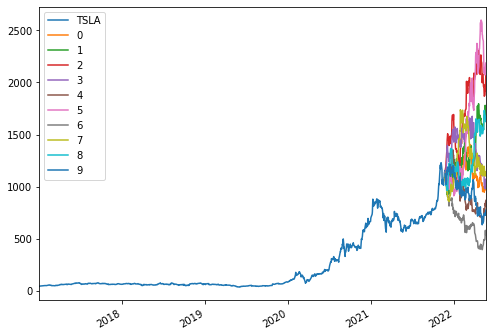

In [16]:
# Precios simulados con los precios descargados
pd.concat([closes_tsla,sim_closes]).plot(figsize = (8,6));

In [17]:
from datetime import date
Hoy = date.today()
expiry = '2022-05-20'
# strike price
K = 1105 
nscen = 100000
dates = pd.date_range(start= Hoy, 
                      periods = ndays)
ndays = len(dates)
# condición inicial del precio a simular
S0 = closes_tsla.iloc[-1,0]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r,
                       index = dates)

# simular los precios
sim_closes = S0*np.exp(sim_ret.cumsum())

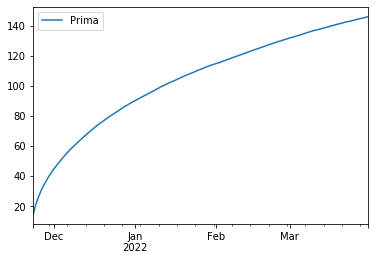

In [18]:
# valor del call 
strike = 1105
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes, 0).mean(axis=1)}, 
                    index = dates)
call.plot();

In [19]:
call.iloc[-1]

Prima    145.985
Name: 2022-03-31 00:00:00, dtype: float64

In [20]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc = mean_est, scale = sigma_est)
i2 = st.norm.interval(confianza, loc = mean_est, scale=sigma_est)
print(i1)
print(i2)

(142.5878318170461, 149.38281116339255)
(142.58787293946472, 149.38277004097392)


In [21]:
vol = ret_tsla['TSLA'].std()*np.sqrt(252)
media = ret_tsla['TSLA'].mean()*252
maduracion = ndays
st = closes_tsla.iloc[-1,0]
rf = r*360

In [22]:
#Black Scholes
from scipy.stats import norm
d1 = (np.log(st/K)+(rf+(vol**2)/2))/vol
d2 = d1-vol
put = K*np.exp(-rf)*norm.cdf(-d2)-st*norm.cdf(-d1)
print('El valor de la opción con Black Scholes es:',put)
print('Valor de la opción simulado es de:',call.iloc[-1].values)

El valor de la opción con Black Scholes es: 259.7969534981673
Valor de la opción simulado es de: [145.98532149]


In [23]:
# Procedimiento de Cristina

In [48]:
def get_adj_closes(tickers, start_date=None, end_date=None):
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    closes = closes['Adj Close']
    closes.sort_index(inplace=True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

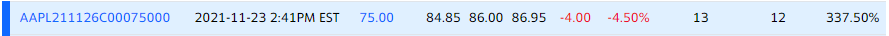

In [49]:
from IPython.display import Image
Image(filename='Captura.png')

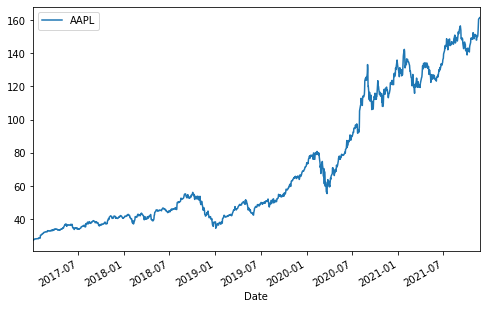

In [50]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

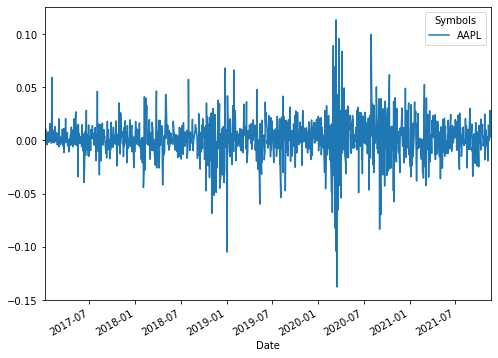

In [51]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize =(8,6));

In [52]:
Ri = closes_aapl.pct_change(1).iloc[1:]
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2021-11-17,0.016
2021-11-18,0.029
2021-11-19,0.017


In [53]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-05-20'

nscen = 10000
dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06',
                ...
                '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
                '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
                '2022-05-19', '2022-05-20'],
               dtype='datetime64[ns]', length=129, freq='B'), 129)

In [54]:
ri = calc_daily_ret(closes_aapl)
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]
dt = 1
Z = np.random.randn(ndays,nscen) 
sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)
Ri_dt = pd.DataFrame(mu_R * dt + Z * sigma_r * np.sqrt(dt),
                     index = dates)
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*np.exp(sim_ret_ri.cumsum())

In [55]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0014414546709258416, 0.019197990049748703)

In [56]:
r = 0.00018/360

In [57]:
today = pd.to_datetime(date.today())
expiry = '2022-05-20'

dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')

ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', length=129, freq='B')

In [58]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-11-23,0.006,0.006,-0.003,...,0.011,-7.929e-03,-0.009
2021-11-24,-0.006,0.002,-0.013,...,0.014,2.379e-04,-0.041
2021-11-25,-0.025,0.016,-0.033,...,0.012,4.600e-04,-0.021
2021-11-26,-0.024,0.003,-0.013,...,0.028,2.697e-02,-0.014
2021-11-29,-0.042,0.027,-0.027,...,0.057,4.141e-02,-0.035
...,...,...,...,...,...,...,...
2022-05-16,0.062,0.201,-0.103,...,-0.015,-1.612e-02,0.197
2022-05-17,0.080,0.211,-0.112,...,-0.032,1.318e-02,0.195
2022-05-18,0.066,0.200,-0.102,...,-0.035,-1.228e-02,0.187
2022-05-19,0.040,0.216,-0.096,...,-0.053,-1.923e-02,0.194


In [59]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-11-23,0.003,0.006,-0.008,...,7.793e-03,0.005,-0.024
2021-11-24,-0.012,0.049,-0.016,...,-1.008e-04,-0.002,-0.019
2021-11-25,0.008,0.050,-0.002,...,1.167e-02,-0.010,-0.027
2021-11-26,0.040,0.042,0.005,...,1.090e-02,-0.023,-0.033
2021-11-29,0.017,0.080,0.030,...,1.671e-02,-0.012,-0.038
...,...,...,...,...,...,...,...
2022-05-16,0.034,0.067,-0.104,...,1.620e-01,0.186,0.069
2022-05-17,0.021,0.037,-0.096,...,1.646e-01,0.186,0.081
2022-05-18,0.031,0.029,-0.115,...,2.088e-01,0.184,0.077
2022-05-19,0.004,0.038,-0.129,...,2.191e-01,0.171,0.066


In [60]:
S0 = closes_aapl.iloc[-1,0]  
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2021-11-23,161.969,162.365,160.173,...,162.673,162.237,157.656
2021-11-24,159.561,169.537,158.895,...,161.394,161.158,158.432
2021-11-25,162.641,169.616,161.044,...,163.305,159.831,157.166
2021-11-26,167.917,168.311,162.216,...,163.179,157.750,156.244
2021-11-29,164.226,174.904,166.339,...,164.129,159.539,155.457
...,...,...,...,...,...,...,...
2022-05-16,166.933,172.576,145.414,...,189.791,194.316,172.874
2022-05-17,164.848,167.443,146.576,...,190.288,194.468,175.022
2022-05-18,166.466,166.188,143.940,...,198.887,193.966,174.391
2022-05-19,161.994,167.622,141.904,...,200.954,191.521,172.454


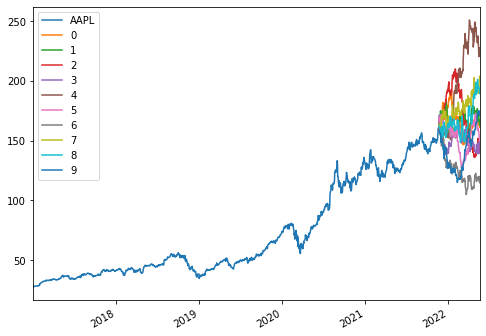

In [61]:
pd.concat([closes_aapl,sim_closes]).plot(figsize = (8,6));

In [67]:
from datetime import date
Hoy = date.today()
expiry = '2022-05-20'
K = 75 
nscen = 100000
dates = pd.date_range(start= Hoy, 
                      periods = ndays)
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r,
                       index = dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

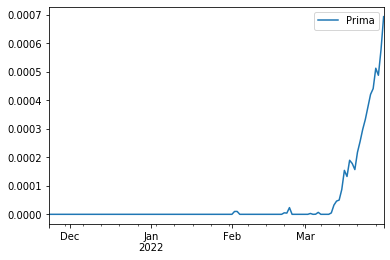

In [68]:
strike = 75
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes, 0).mean(axis=1)}, 
                    index = dates)
call.plot();

In [69]:
call.iloc[-1]

Prima    6.934e-04
Name: 2022-03-31 00:00:00, dtype: float64

In [70]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc = mean_est, scale = sigma_est)
i2 = st.norm.interval(confianza, loc = mean_est, scale=sigma_est)
print(i1)
print(i2)

(-0.22512432356035852, 0.22651109843212333)
(-0.22512159031571669, 0.2265083651874815)


In [72]:
vol = ret_aapl['AAPL'].std()*np.sqrt(252)
media = ret_aapl['AAPL'].mean()*252
maduracion = ndays
st = closes_aapl.iloc[-1,0]
rf = r*360

In [73]:
#Black Scholes
from scipy.stats import norm
d1 = (np.log(st/K)+(rf+(vol**2)/2))/vol
d2 = d1-vol
put = K*np.exp(-rf)*norm.cdf(-d2)-st*norm.cdf(-d1)
print('Opción con Black Scholes:',put)
print('Opción simulada:',call.iloc[-1].values)

Opción con Black Scholes: 0.06340921703484814
Opción simulada: [0.00069339]
